KNN Accuracy: 0.63
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.75      0.72       412
           1       0.50      0.42      0.46       244

    accuracy                           0.63       656
   macro avg       0.59      0.59      0.59       656
weighted avg       0.62      0.63      0.62       656

Decision Tree Accuracy: 0.58
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.62      0.65       412
           1       0.44      0.51      0.47       244

    accuracy                           0.58       656
   macro avg       0.56      0.56      0.56       656
weighted avg       0.59      0.58      0.58       656



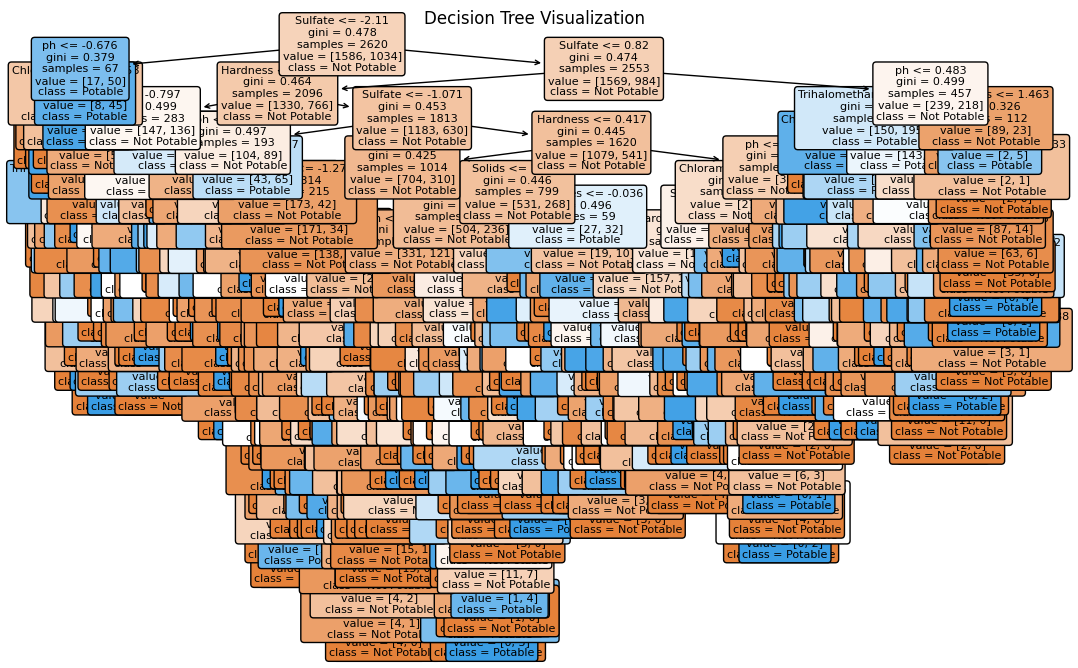

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = "/kaggle/input/lindaaa/water quality prediction.csv"
df = pd.read_csv(file_path)

# Handling missing values by filling with mean
df.fillna(df.mean(), inplace=True)

# Splitting features and target variable
X = df.drop(columns=['Potability'])
y = df['Potability']

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Making predictions with KNN
y_pred_knn = knn.predict(X_test)

# Evaluating the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

# Training Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Making predictions with Decision Tree
y_pred_dt = dt.predict(X_test)

# Evaluating the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

# Visualizing the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=X.columns, class_names=['Not Potable', 'Potable'], filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree Visualization")
plt.show()
